# CS 109A/AC 209A/STAT 121A Data Science: Homework 2
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 21st, 2016 at 11:59pm

---

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW2.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**


Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [16]:
import numpy as np
import pandas as pd
import random
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.cross_validation import train_test_split as sk_split
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.metrics import r2_score
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
for i in range(30):
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Wheelahan, Christopher

### Part (b): Course Number

AC 209a

### Part (c): Who did you work with?

Jon Jay and I shared some thoughts on algorithmic methodology at a fairly early stage.

---

## Problem 1: Inside the Models in Scikit-learn

In this problem, we will be implementing K-Nearest Neighbour and simple linear regression for predicting a quantitative variable. We will compare the performance of our implementation with those of Scikit-learn (``sklearn``).

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y. 

### Part (a): Implement the models by hand
In this part you **may not** use ``sklearn`` for any task.

In the following, you may use ``numpy`` arrays instead of ``pandas`` dataframes.

- Implement a funtion ``split``, which satifies:
    - input: an ``nx2`` dataframe ``data``, a float ``m``
    - return: an ``nx2`` dataframe ``train`` and an ``nx2`` dataframe ``test``, consisting of ``m`` percent and ``100 - m`` percent of the data, respectively.


- Implement K-Nearest Neighbour for predicting a quantitative variable. That is, write a function, ``knn_predict``, that satisfies:
    - input: an integer ``k``, an ``n x 2`` dataframe training set ``train``, an ``n x 1`` dataframe testing set ``test``
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.



- Implement linear regression for predicting a quantitative variable. That is, write a function ``linear_reg_fit`` that satisfies:
    - input: an ``nx2`` dataframe training set ``train``
    - return: the coefficients of the linear regression model - a float ``slope`` and a float ``intercept``.
    
    
- Write a function ``linear_reg_predict`` that satisfies:
    - input: an ``nx1`` dataframe testing set ``test``, as well as the coefficients of the linear regression model
    - return: an ``nx2`` dataframe, whose first column is that of ``test`` and whose second column is the predicted values.
    
    
- Implement a function ``score`` that satisfies:
    - input: an ``nx2`` dataframe ``predicted``, an ``nx2`` dataframe ``actual`` 
    - return: R^2 coefficient of the fit of the predicted values.

**Solution:**

In [2]:
def split(data, m):
    rand = np.random.rand(len(data)) < (m * .01)
    data.index = np.random.rand(len(data))
    train = data[rand]
    test = data[~rand]
    test.index= [range(0, len(test))]
    train.index= [range(0, len(train))]
    
    return train, test

In [3]:
def knn_predict(train, test, k):
    
    knn_list = [] 
    
    for tdtest, rowtest in test.iterrows():
        diff_list = []
        knn_vals_list = []

        for tdtrain, rowtrain in train.iterrows():
            diff = (rowtrain['x'] - rowtest['x'])
            diff_list.append(abs(diff))
            
        for each in range(k):
            a = diff_list.index(min(diff_list))
            knn_vals_list.append(train.iloc[a][1])
            diff_list.pop(a)
            
        b = float(sum(knn_vals_list))
        c = len(knn_vals_list)
        knn_list.append(round(b/c, 4))
    
    test['y'] = knn_list
    return test

In [4]:
def linear_reg_fit(train):
    fit = np.polyfit(train['x'], train['y'], 1)
    cons = fit[1]
    slope = fit[0]
    return slope, cons

In [5]:
def linear_reg_predict(test, slope, cons):
    lin_reg_list = []
    for tdtest, rowtest in test.iterrows():
        lin_reg_list.append(rowtest['x'] * slope + cons)
    test['y'] = lin_reg_list
    return test

In [6]:
def score(predict, actual):
    Y = actual['y']
    Y_hat = predict['y']
    RSS = np.sum((Y-Y_hat)**2)
    TSS = np.sum( (Y-np.mean(Y))**2)
    R2 = 1 - RSS/TSS
    return R2

### Part (b): Compare with ``sklearn``

- Load the contents of ``dataset_1_full.txt`` into a ``pandas`` dataframe, or ``numpy`` array. 


- Use your functions from Part (a) to split the data into training and testing sets (70-30). Evaluate how KNN and linear regression each perform on this dataset.


- Use ``sklearn`` to split the data into training and testing sets (70-30). Use ``sklearn`` to evaluate how KNN and linear regression each perform on this dataset.


- Use Python's ``time`` library to measure how well your implementations compare with that of ``sklearn``. What can you do (algorithmically or codewise) to make your implementation faster or more efficient?

**Solution:**

In [10]:
# Anything that begins with "start" or "end" and has time.clock() is just for timing the operation, and is not
# algorithmically important

# import and split
df = pd.read_csv('dataset/dataset_1_full.txt')
start_split = time.clock()
train, test = split(df, 70)
end_split = time.clock()

# create KNN prediction file
start_knn = time.clock()
knn_res = knn_predict(train, test, 1)
end_knn = time.clock()

# score KNN
start_score1 = time.clock()
sc = score(knn_res, train)
end_score1 = time.clock()

# create Regression prediction file
start_reg = time.clock()
slope_fit, cons_fit = linear_reg_fit(train)
lin_reg = linear_reg_predict(test, slope_fit, cons_fit)

# score Lin Reg
start_score2 = time.clock()
x = score(lin_reg, train)
end_score2 = time.clock()
end_reg = time.clock()

# total up the performance times
split_time = end_split - start_split
knn_time = end_knn - start_knn
reg_time = end_reg - start_reg
score1_time = end_score1 - start_score1
score2_time = end_score2 - start_score2

# and print our results
print "The split time is:", split_time
print "The KNN time is:", knn_time
print "The regression time is:", reg_time
print "The Score time for KNN is:", score1_time
print "The Score time for regression is:", score2_time

The split time is: 0.002192
The KNN time is: 5.051883
The regression time is: 0.11177
The Score time for KNN is: 0.002134
The Score time for regression is: 0.00368


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
# Anything that begins with "start" or "end" and has time.clock() is just for timing the operation, and is not
# algorithmically important

# import and split
df = pd.read_csv('dataset/dataset_1_full.txt')
start_split = time.clock()
x_train, x_test, y_train, y_test = sk_split(df[[0]], df[[1]], test_size=0.3)
end_split = time.clock()

# create KNN prediction file
start_knn = time.clock()
neighbors = KNN(n_neighbors=1)
neighbors.fit(x_train, y_train)
predicted_y_knn = neighbors.predict(x_test)
end_knn = time.clock()

# score KNN
start1_score = time.clock()
r2_knn = neighbors.score(predicted_y_knn, y_test)
end1_score = time.clock()

# create Regression prediction file
start_reg = time.clock()
regression = Lin_Reg()
regression.fit(x_train, y_train)
predicted_y_reg = regression.predict(x_test)
end_reg = time.clock()

# score Lin Reg
start2_score = time.clock()
r2_reg = regression.score(predicted_y_reg, y_test)
end2_score = time.clock()

# total up the performance times
split_time = end_split - start_split
knn_time = end_knn - start_knn
reg_time = end_reg - start_reg
score1_time = end1_score - start1_score
score2_time = end2_score - start2_score

# and print our results
print "The split time is:", split_time
print "The KNN time is:", knn_time
print "The regression time is:", reg_time
print "The Score time for KNN is:", score1_time
print "The Score time for regression is:", score2_time

The split time is: 0.012025
The KNN time is: 0.007003
The regression time is: 0.006191
The Score time for KNN is: 0.001737
The Score time for regression is: 0.000907000000002


Split time - After a few tests, mine is the same or faster than SciKit_learn! Very exciting.

KNN Time - My KNN is suuuuuper slow compared to SciKit_learn. This is certainly due to the fact that I do many, many loops in my algorithm. I loop through each test row, then for each of those, loop through the whole training dataset to create a list of differences (absolute values). Then I pick the K nearest neighbors and use those. This could be much improved by creating a matrix of the missing data and training data, then doing matrix subtraction and finding the min within the matrix. This would reduce the looping in my algorithm.

Regression Time - The regression time is also slower than with SciKit-Learn, but not as bad as KNN. Again, using matrix (dataframe) arithmetic would be a faster way of doing this methodology, as opposed to bit-wise arithmetic.

Score time - The score time, after running a few times, does not appear to be appreciably different between my algorithm and SciKit-Learn. I imagine we both use very similar methodologies.


## Problem 2: Handling Missing Data

In this problem, we will be handling the problem of datasets with missing values. Clearly, we cannot simply remove entire rows or columns that contain missing values. In this problem, we explore two different ways to fill in missing values.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

In this problem, you **may not** use ``sklearn`` or build-in ``pandas`` functions to **directly fill in missing values**. Usage of these libraries/pakcages for related tasks is fine.

### Part (a): Model Based Data Imputation

- Describe in detail how predictive models for data (like KNN and simple linear regression) can be used to fill in missing values in a data set.


- Implement your scheme. That is, write code (preferably a function ``fill`` or two functions ``fill_knn``, ``fill_lin_reg``), which takes an ``n x 2`` dataframe or array with values missing in the 2nd column and fills in these values using KNN and linear regression. 


- You need to, also, write code to evaluate the quality of the values you've filled in.

**Solution:**

In [12]:
def fill_knn(df, k):
# neat function that splits our df into df's with nulls and without
    train = df[df['y'].notnull()]
    test = df[df['y'].isnull()]
# run our KNN predict
    new_test = knn_predict(train, test, k)
    
# neat function that fills null values with a list of predicted values
    df['y'].fillna(new_test['y'], inplace=True)
    return df

In [13]:
def fill_linreg(df):
# neat function that splits our df into df's with nulls and without
    train = df[df['y'].notnull()]
    test = df[df['y'].isnull()]
    
# run our linear regression fit and predict
    slope, cons = linear_reg_fit(train)
    new_test = linear_reg_predict(test, slope, cons)
    
# neat function that fills null values with a list of predicted values
    df['y'].fillna(new_test['y'], inplace=True)
    return df

Also copying these same methods that also return missing indices to help with visualization in the next section

In [14]:
def fill_knn2(df, k):
    train = df[df['y'].notnull()]
    test = df[df['y'].isnull()]
    new_test = knn_predict(train, test, k)
    df['y'].fillna(new_test['y'], inplace=True)
    test['y'].fillna(new_test['y'], inplace=True)
    return df, test

In [15]:
def fill_linreg2(df):
    train = df[df['y'].notnull()]
    test = df[df['y'].isnull()]
    slope, cons = linear_reg_fit(train)
    new_test = linear_reg_predict(test, slope, cons)
    df['y'].fillna(new_test['y'], inplace=True)
    test['y'].fillna(new_test['y'], inplace=True)
    return df, test

### Part (b): Which Model is Better?

- For datasets ``dataset_1_missing.txt`` to ``dataset_6_missing.txt``, compare the result of filling in the missing values using KNN and linear regression, using both the R^2 coefficient as well as data visualization (the correct y-values are contained in ``dataset_1_full.txt`` to ``dataset_6_full.txt``).. 


- Use your analysis to form conjectures regarding the conditions under which KNN performs better than linear regression, under which linear regression performs better than KNN and under which both perform equally (well or poorly). Explain in detail exactly what might cause each model to fail or perform well. 



- Using ``dataset_1_missing.txt``, explain the impact of the choice of $k$ on the performance of KNN. 


Use numerical analysis and data visualization to support every part of your argument.

**Solution:**

In [84]:
def two_b(csv_full, csv_missing):
    actual = pd.read_csv(csv_full)
    df_knn = pd.read_csv(csv_missing)
    df_reg = pd.read_csv(csv_missing)
    
# predict and print KNN and score
    predict_knn, predict_knn_miss = fill_knn2(df_knn, 1)
    print "KNN R-squared for", csv_missing, "is:", score(predict_knn, actual)

# predict and print Regression and score
    predict_reg, predict_reg_miss = fill_linreg2(df_reg)
    print "Regression R-squared for", csv_missing, "is:", score(predict_reg, actual)

# do all the plotting
    firstplot = plt.figure(figsize=(20, 20))
    ds123 = firstplot.add_subplot(221)
    plt.xlabel('x')
    plt.ylabel('y')
    ds123.scatter(actual['x'], actual['y'], c="blue", label='Actual', s=20)
    ds123.scatter(predict_knn_miss['x'], predict_knn_miss['y'], c="red", label='KNN', s=20)
    ds123.scatter(predict_reg_miss['x'], predict_reg_miss['y'], c="green", label='Regression', s=20)
    plt.title(csv_full)
    plt.legend()
    plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KNN R-squared for dataset/dataset_1_missing.txt is: 0.667812410217
Regression R-squared for dataset/dataset_1_missing.txt is: 0.825824719511


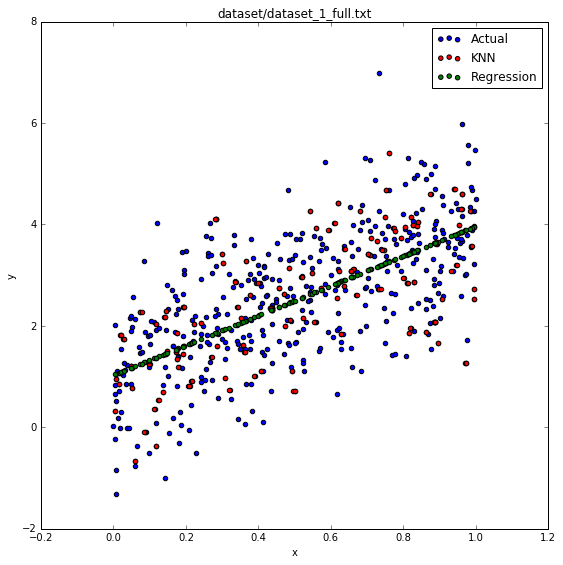

KNN R-squared for dataset/dataset_2_missing.txt is: 0.96135182496
Regression R-squared for dataset/dataset_2_missing.txt is: 0.956435488427


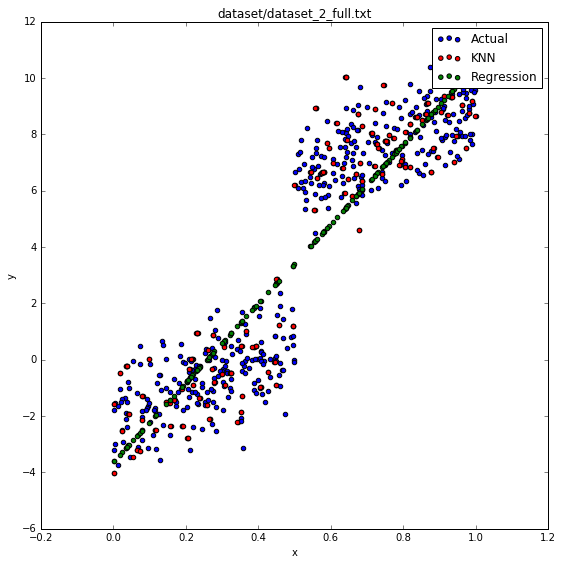

KNN R-squared for dataset/dataset_3_missing.txt is: 0.383854329182
Regression R-squared for dataset/dataset_3_missing.txt is: 0.706487983904


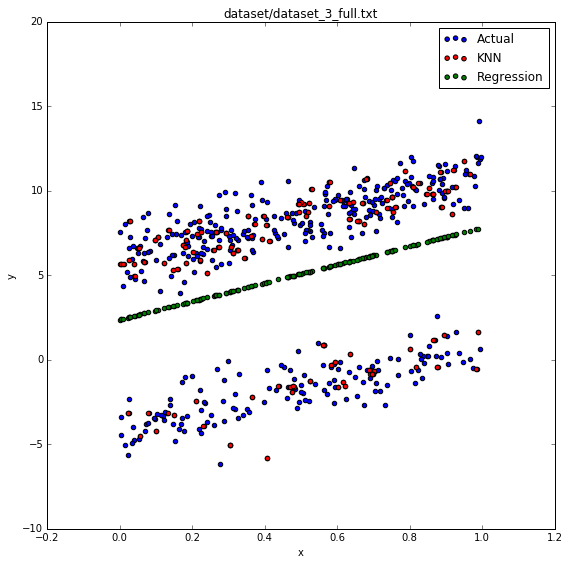

KNN R-squared for dataset/dataset_4_missing.txt is: 0.941365223744
Regression R-squared for dataset/dataset_4_missing.txt is: 0.89712591708


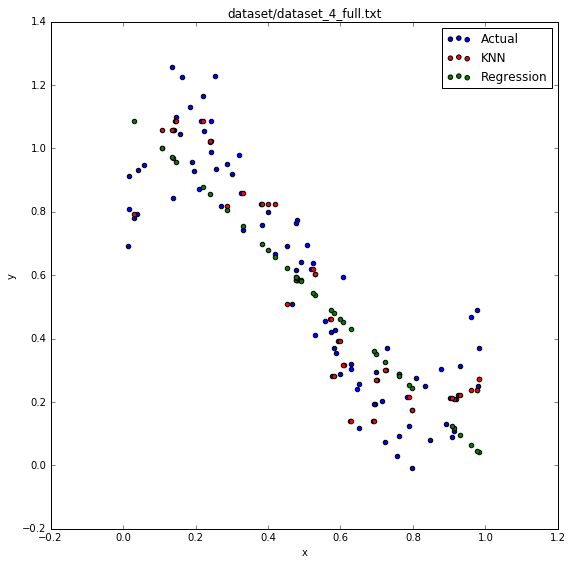

KNN R-squared for dataset/dataset_5_missing.txt is: 0.870818745635
Regression R-squared for dataset/dataset_5_missing.txt is: 0.74996267382


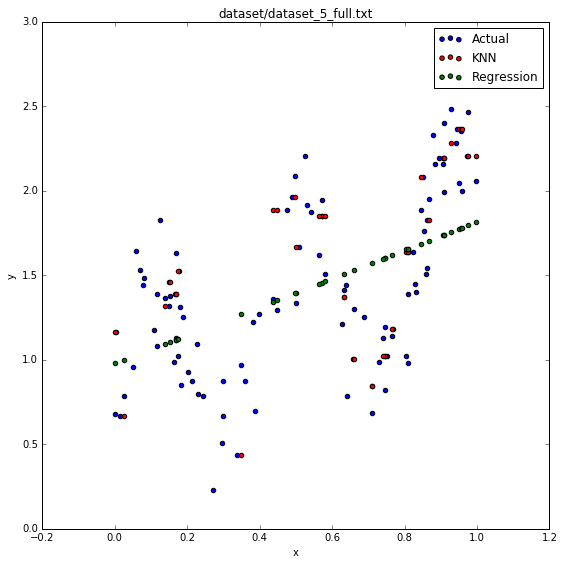

KNN R-squared for dataset/dataset_6_missing.txt is: 0.601159400991
Regression R-squared for dataset/dataset_6_missing.txt is: 0.773699737393


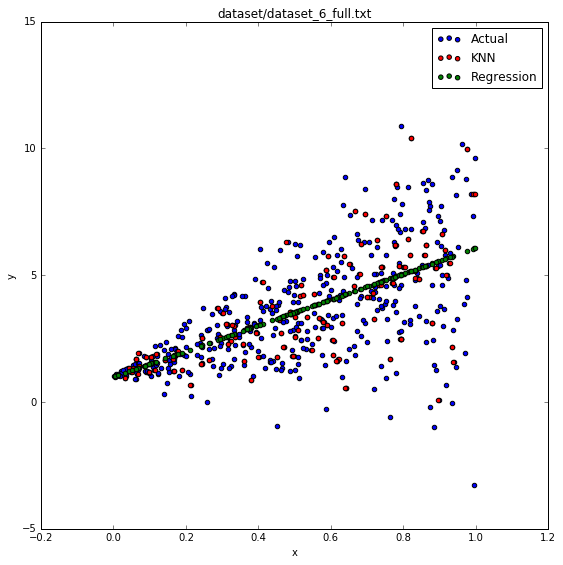

In [85]:
two_b('dataset/dataset_1_full.txt', 'dataset/dataset_1_missing.txt')
two_b('dataset/dataset_2_full.txt', 'dataset/dataset_2_missing.txt')
two_b('dataset/dataset_3_full.txt', 'dataset/dataset_3_missing.txt')
two_b('dataset/dataset_4_full.txt', 'dataset/dataset_4_missing.txt')
two_b('dataset/dataset_5_full.txt', 'dataset/dataset_5_missing.txt')
two_b('dataset/dataset_6_full.txt', 'dataset/dataset_6_missing.txt')

Dataset 1 - Linear regression looks pretty good here! KNN is showing some difficulty. Because this is a roughly linear model with equal error above and below, the errors basically cancel each other out. The KNN results are okay but not great - the reason for this is that it does not take any structure into account. The KNN results are within the upper and lower limits of the data cloud, but would just as often be accurate, as they would be on the wrong edge of the cloud.

Dataset 2 - KNN and regression both perform equally here, more or less. I think if the discrepancy between the two clusters were higher, we may have more difficulty with linear regression. The regression fit passes through the middle of both clouds here, which shows that it's pretty good, but there is some trouble in the space in-between. It would be better to model two different fits for different ranges of X. KNN does pretty well within the clouds.

Dataset 3 - Regression is okay here, and KNN is really not good. I think this is because the "nearest neighbor" could be equally likely in the higher or the lower cloud of data. So really, you're only in the right cloud 50% of the time. Then any other variability further decreases from your R2. With linear regression, you're off all the time... but at least there is structure for how/why you're off and you can correct for it later (clustering correction).

Dataset 4 - These data have a kind of sine-wavey sort of shape. If you restrict the linear regression to one half-wavelength, the fit would be great! However, the data we see here has a bit more and the data "flattens" out the regression fit and the regression fit doesn't work quite as well for data in the middle of the dataset. As such, KNN performs slightly better.

Dataset 5 - In this data set, we see a "W" shape (which could theoretically continue with a positively sloped wave function above and below our observed dataset). What the regression does here is really just split the difference. It is only good for when the model intersects the data shape. In order to match this data, we would need a higher degree polynomial model to fit the data. KNN performs better as a result, although not by a whole lot.

Dataset 6 - This linear regression model is great for small values of x, and gets progressively worse as x gets larger in this case. If the data continued farther, the results would get worse and worse as x gets larger. KNN gets about teh same performance here... good for small values of x, less good as x gets larger.

---

## Problem 3: Is the Best (Linear Model) Good Enough?

In this problem, we will specifically look at conditions under which linear regression excels or fails.

The datasets required for this problem is in the ``dataset`` directory. Each file in the ``dataset`` directory contains a one-dimensional data set, with the first column containing the independent variable X, and the second column containing the dependent variable Y.

### Part (a): Introduction to Residual Plots

- Read ``dataset_1_full.txt``. Visualize the dataset and make some initial observations.


- For this data set, what can you say about the following linear fits: 

    1. slope = 0.4, intercept = 0.2
    2. slope = 0.4, intercept = 4
    3. linear regression model


- In each case, visualize the fit, compute the residuals, and make a residual plot of predicted values against residuals as well as a residual histogram. What do these plots reveal? 


- Calculate the R^2 coefficient for all three fits. What do the erors reveal? How do they compare to the residual plots?

**Solution:**

In [86]:
def plotit(file):
    ds = pd.read_csv(file)

# Create our three models
    ds['fit1'] = ds['x'] * .4 + 0.2
    ds['fit2'] = ds['x'] * .4 + 4
    slope, cons = linear_reg_fit(ds)
    ds['lin_reg'] = ds['x'] * slope + cons

# and calculate residuals
    ds['fit1_resid'] = ds['fit1'] - ds['y']
    ds['fit2_resid'] = ds['fit2'] - ds['y']
    ds['linreg_resid'] = ds['lin_reg'] - ds['y']

# need to do a small bit of gymnastics so the score function will work properly
    ds_fit1 = ds[[0, 2]]
    ds_fit1.rename(columns={'x': 'x', 'fit1': 'y'}, inplace=True)
    ds_fit2 = ds[[0, 3]]
    ds_fit2.rename(columns={'x': 'x', 'fit2': 'y'}, inplace=True)
    ds_regfit = ds[[0, 4]]
    ds_regfit.rename(columns={'x': 'x', 'lin_reg': 'y'}, inplace=True)

# score
    print "Fit 1 score is:", score(ds_fit1, ds[[0, 1]])
    print "Fit 2 score is:", score(ds_fit2, ds[[0, 1]])
    print "Regression score is:", score(ds_regfit, ds[[0, 1]])

# and plot... first a big graph with the data and fits
    thirdplot = plt.figure(figsize=(30, 30))
    three_a = thirdplot.add_subplot(221)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Dataset w/ fit line')
    plt.plot(ds['x'], ds['fit1'], c='green', label='fit1')
    plt.plot(ds['x'], ds['fit2'], c='red', label='fit2')
    plt.plot(ds['x'], ds['lin_reg'], c='Yellow', label='Lin Reg')
    plt.legend()
    three_a.scatter(ds['x'], ds['y'], c='blue')
    plt.show()

# Plot the x v. fit 1  residuals
    resid_plot = plt.figure(figsize=(15, 15))
    three_a_res1 = resid_plot.add_subplot(221)
    plt.xlabel('x')
    plt.ylabel('resid')
    plt.title('X vs Fit 1 Residuals')
    three_a_res1.scatter(ds['x'], ds['fit1_resid'], c='blue')

    three_a_res1 = resid_plot.add_subplot(222)
    plt.title('Fit 1 Residual Histogram')
    three_a_res1.hist(ds['fit1_resid'])


    plt.show()
    
# plot the x v. fit 2 residuals
    thirdplot2 = plt.figure(figsize=(15, 15))

    three_a_res2 = thirdplot2.add_subplot(221)
    plt.xlabel('x')
    plt.ylabel('resid')
    plt.title('X vs Fit 2 Residuals')
    three_a_res2.scatter(ds['x'], ds['fit2_resid'], c='blue')

    three_a_res2 = thirdplot2.add_subplot(222)
    plt.title('Fit 2 Residual Histogram')
    three_a_res2.hist(ds['fit2_resid'])

    plt.show()

# and plot the x v. regression fit residuals
    thirdplot3 = plt.figure(figsize=(15, 15))

    three_a_res3 = thirdplot3.add_subplot(221)
    plt.xlabel('x')
    plt.ylabel('resid')
    plt.title('X vs Regression Residuals')
    three_a_res3.scatter(ds['x'], ds['linreg_resid'], c='blue')


    three_a_res3 = thirdplot3.add_subplot(222)
    plt.title('Linear Regression Residual Histogram')
    three_a_res3.hist(ds['linreg_resid'])

    plt.show()

Fit 1 score is: -2.54429006179
Fit 2 score is: -1.49677532281
Regression score is: 0.430621521722


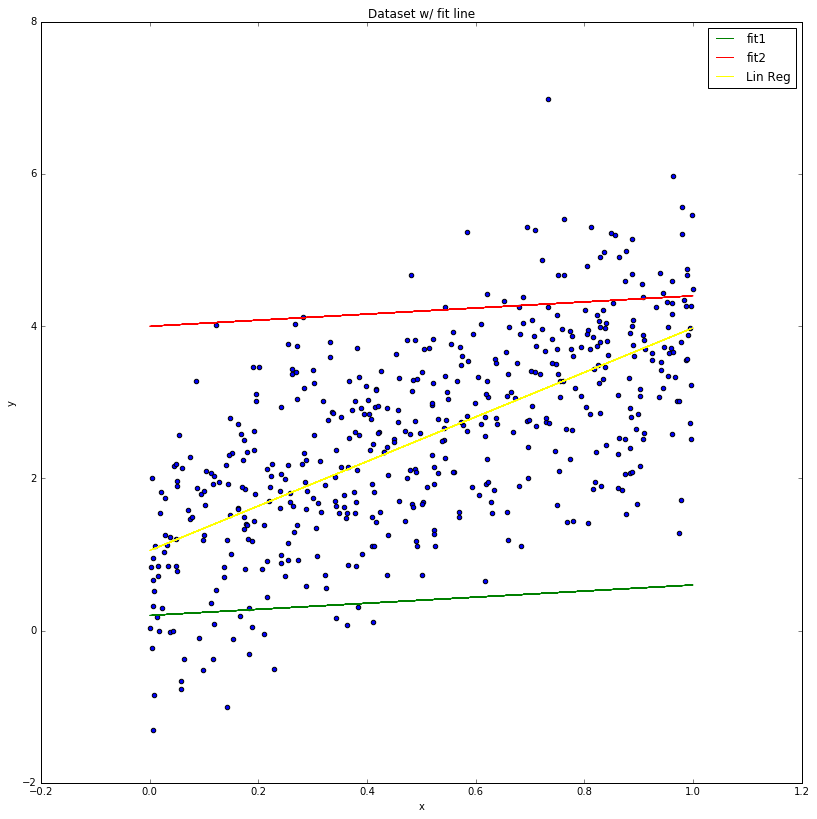

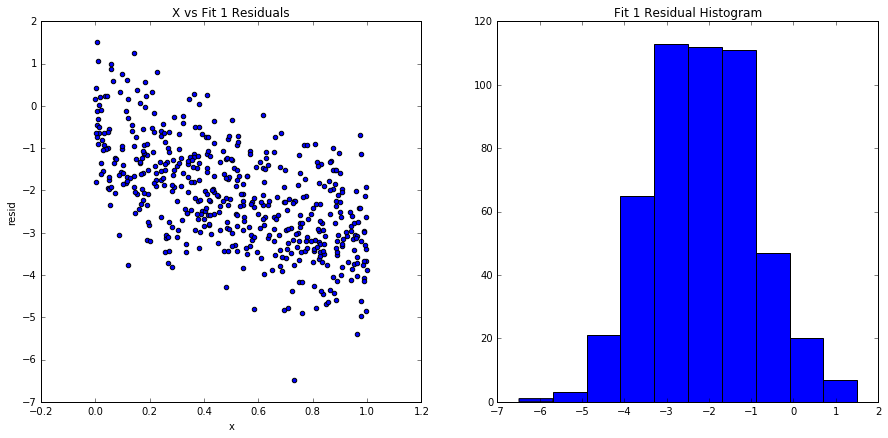

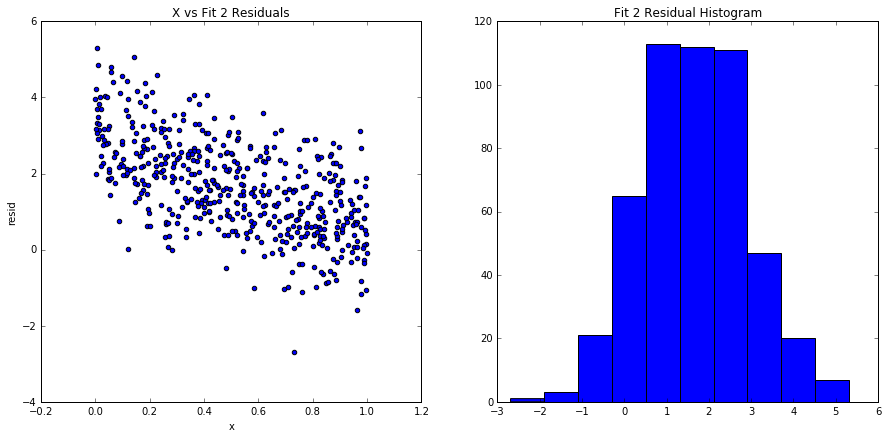

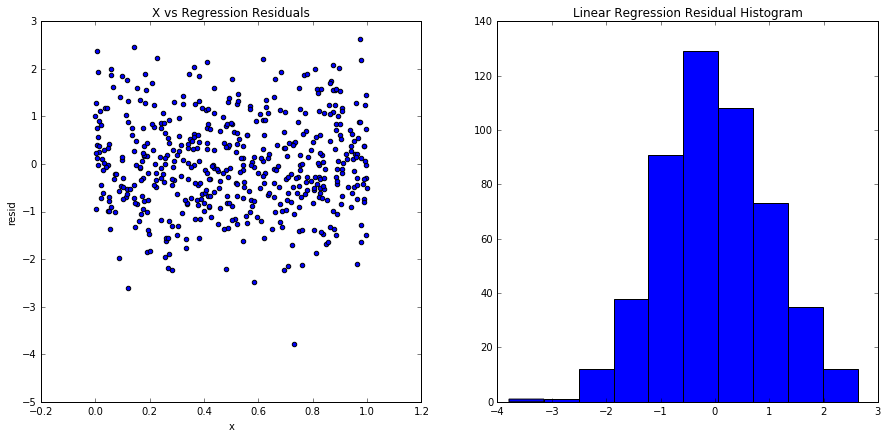

In [87]:
plotit('dataset/dataset_1_full.txt')

The fit lines are really not that good here. Fit 1 is significantly below the data cloud (intercept too low) and fit 2 is above the data cloud (intercept too high). The slopes are both 0.2, which is too shallow as well. The resid plot shows structure (a slope) which we don't want. We want for errors to be normally distrbuted around 0. The residuals are normally distributed, but are centered around -2 for fit 1, and +2 for fit 2... which makes sense with the plots being below and above the data cloud, respectively. The errors are actually negative for both... so we know that the fit will not be as good as a linear regression fit, which by composition only varies between 0-1.

The regression fit, on the other hand, is pretty good! 0.43 R-squared is not spectacular, but much better than our other two fits. There is no discernable structure to the residual plot, and they are normally distributed around 0. 

### Part (b): What do Residual Plots Reveal?

- Read datasets ``dataset_2_full.txt`` through ``dataset_6_full.txt``. In each case, visualize the fit of the linear regression model, compute the residuals, and make a residual plot of predicted values against residuals as well as a residual histogram. What do these plots reveal about the fit of the model? 


- Calculate the R^2 coefficient each fit. What do the erors reveal? How do they compare to the residual plots?


- Based on your analysis, form conjectures regarding the precise relationship between the residual plots and the fit of the linear regression model. Conjecture on the precise conditions under which linear regression model is an appropriate model for a given dataset.

**Solution:**

Fit 1 score is: -0.478945883253
Fit 2 score is: 0.0299308948638
Regression score is: 0.842957182013


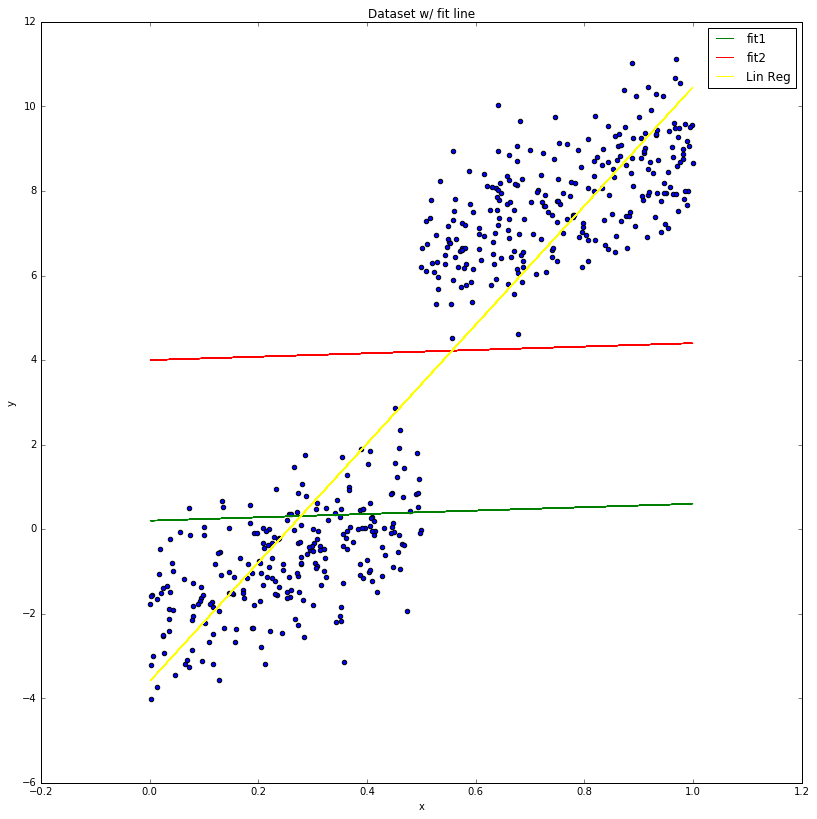

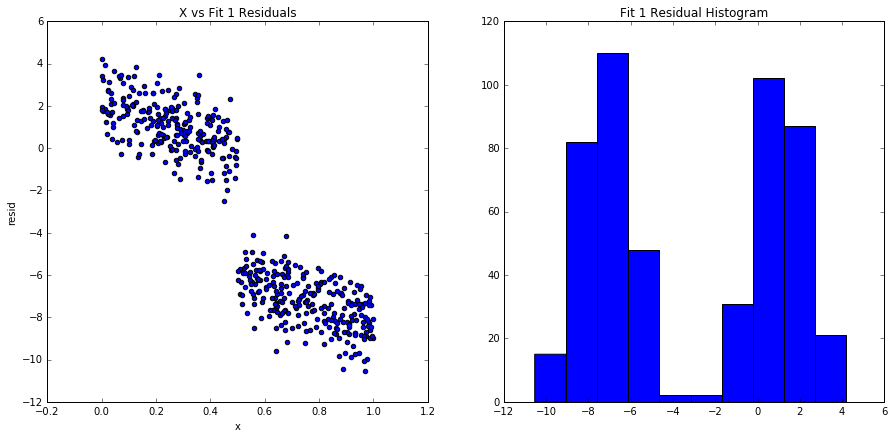

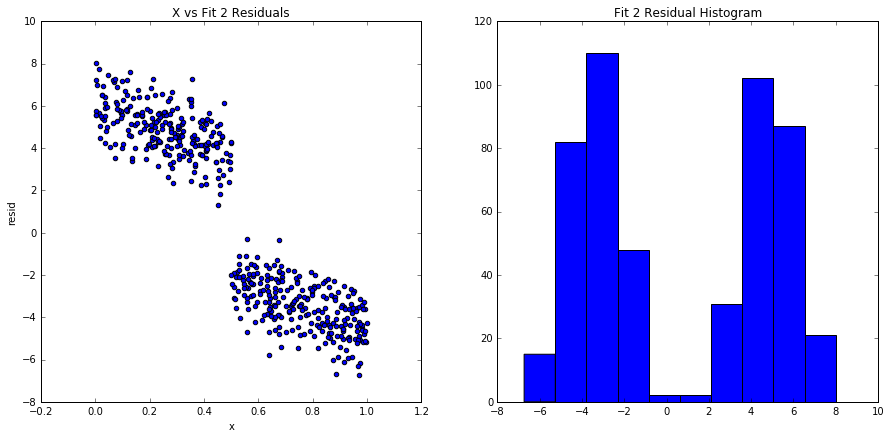

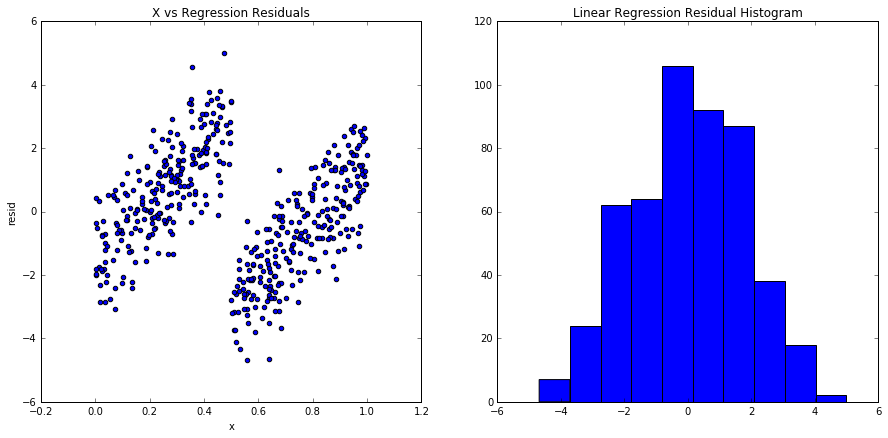

Fit 1 score is: -0.838194641492
Fit 2 score is: -0.0169746603171
Regression score is: 0.0779354128276


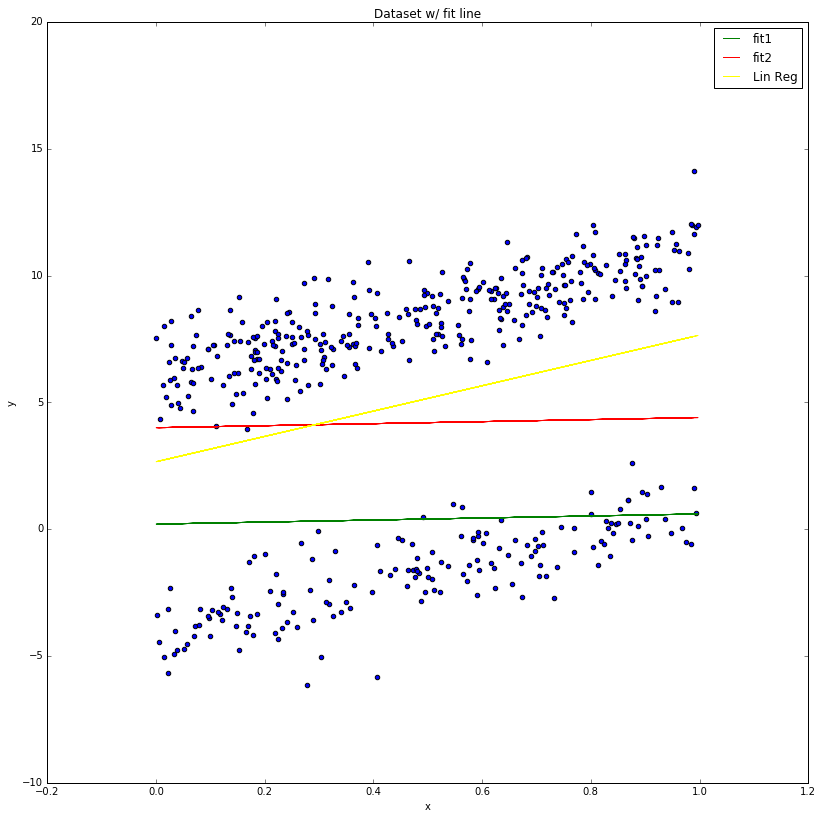

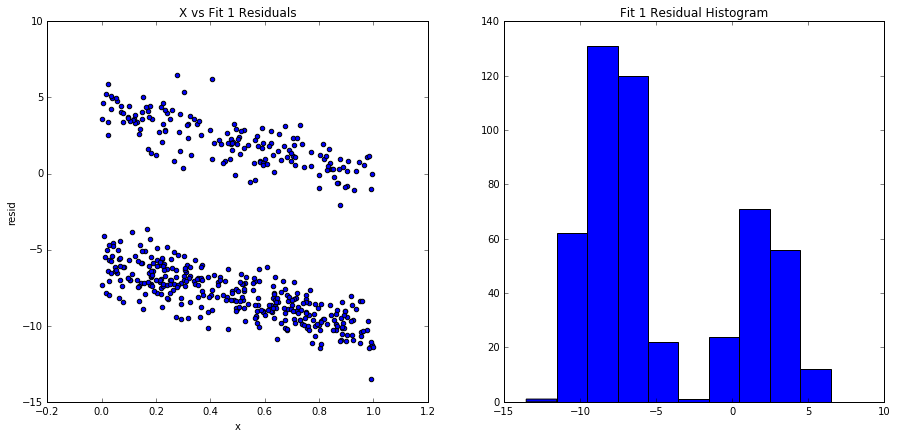

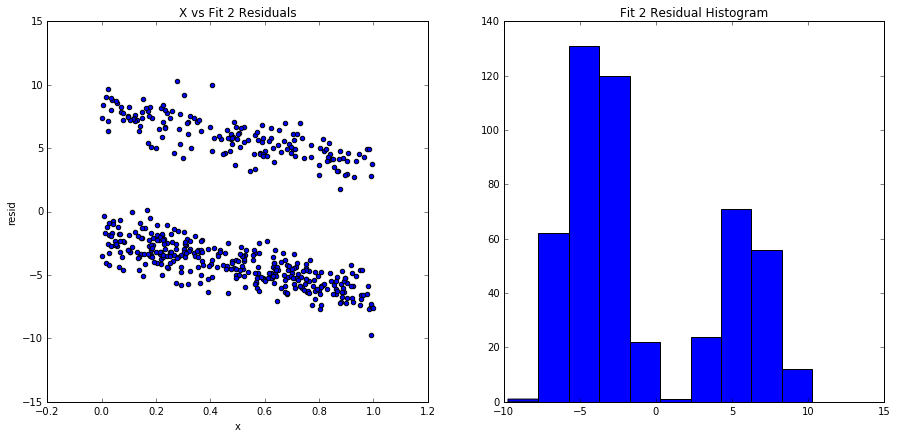

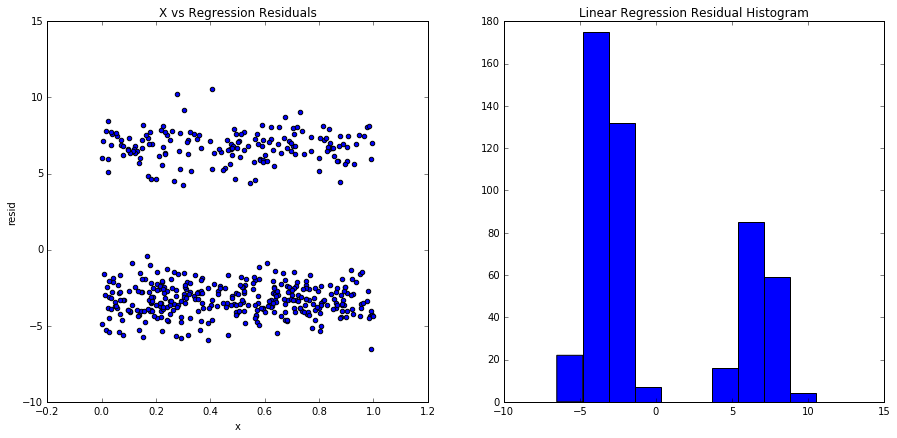

Fit 1 score is: -0.88383657317
Fit 2 score is: -108.813100841
Regression score is: 0.758102286902


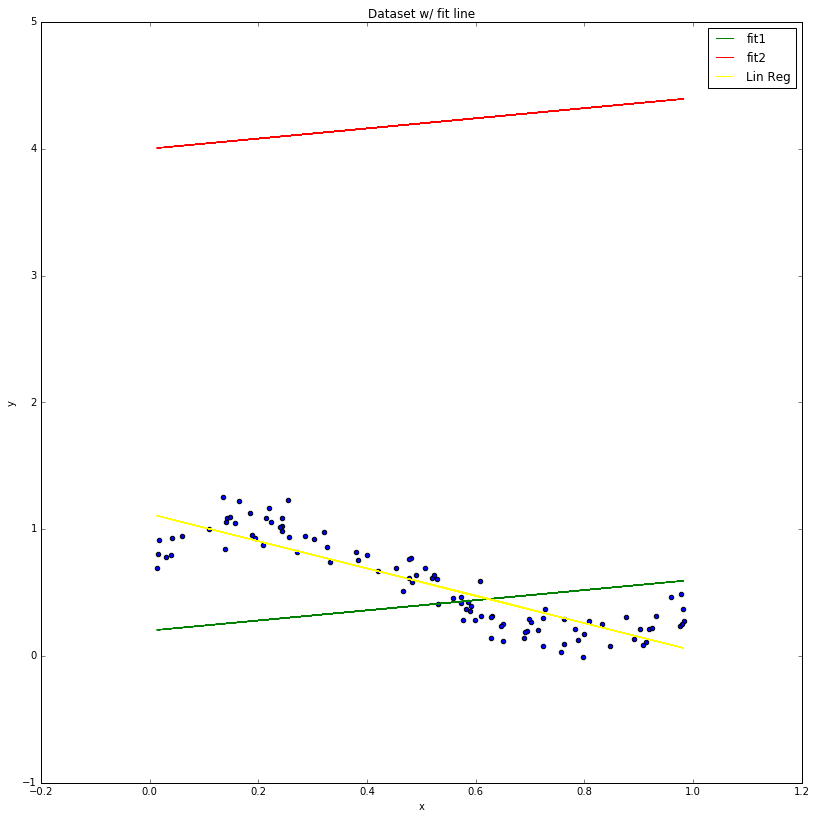

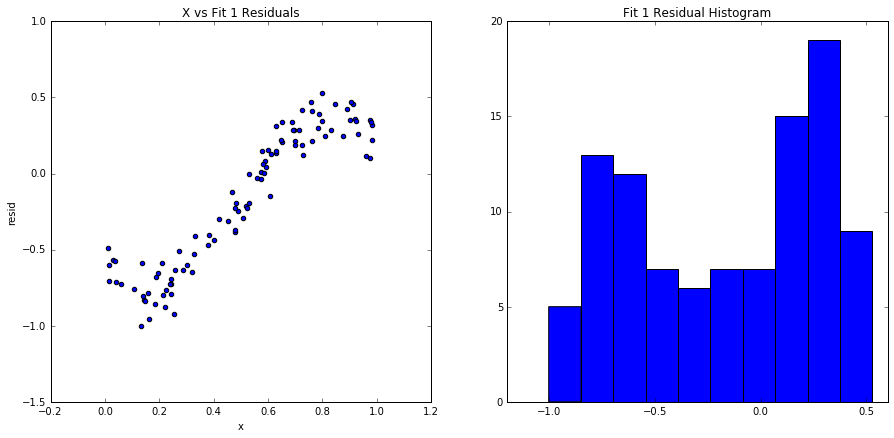

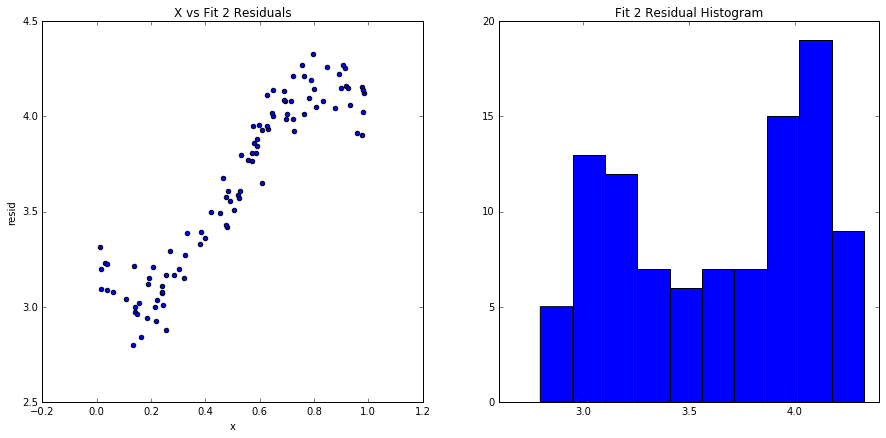

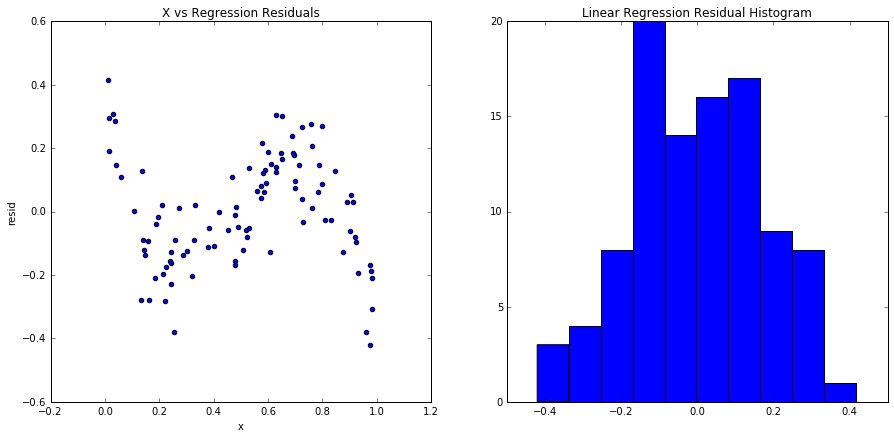

Fit 1 score is: -3.63222754724
Fit 2 score is: -28.8723618294
Regression score is: 0.298392982511


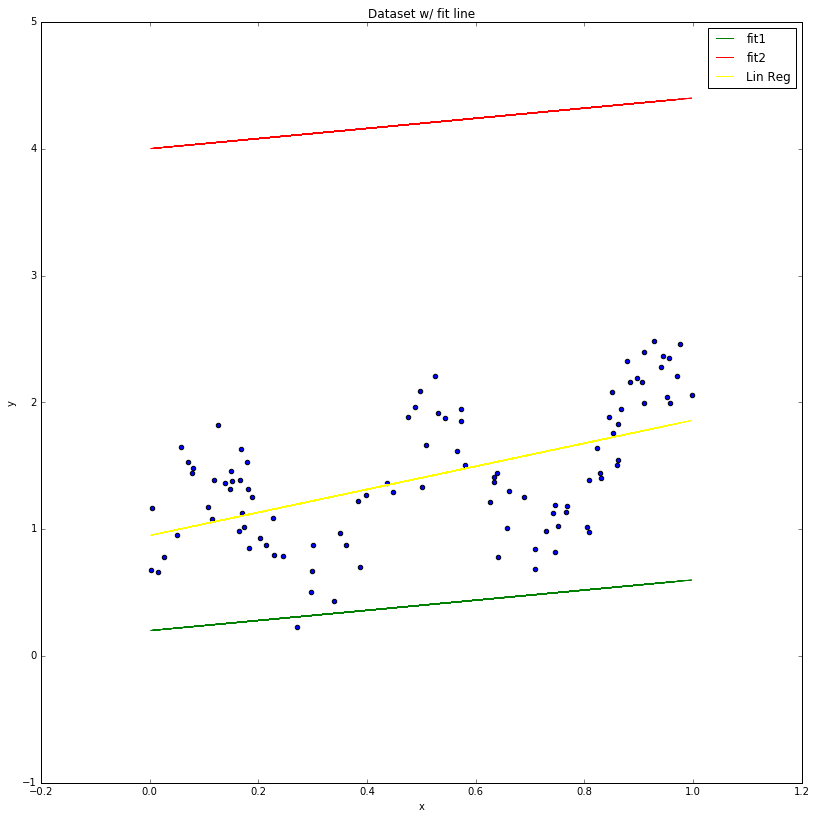

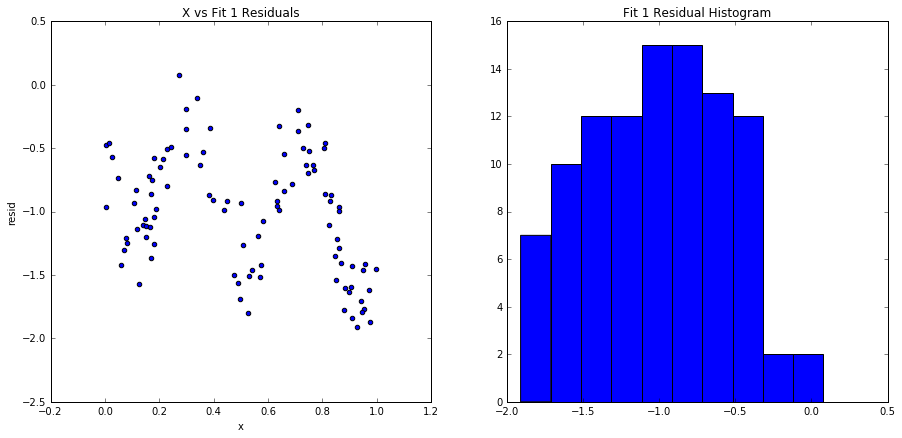

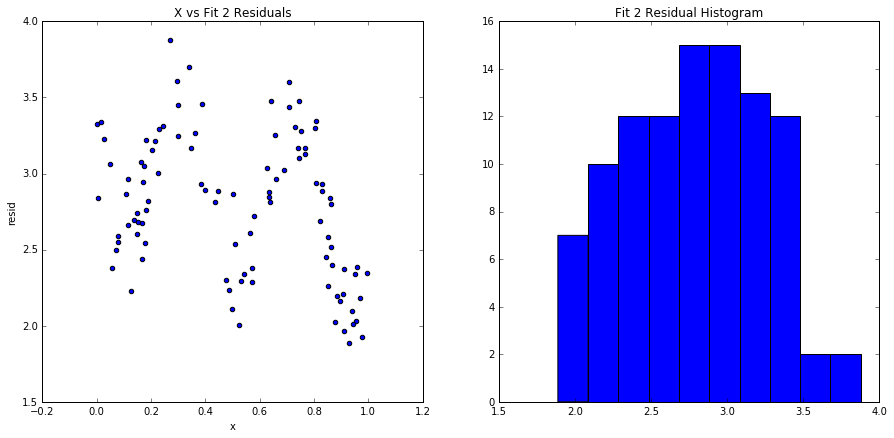

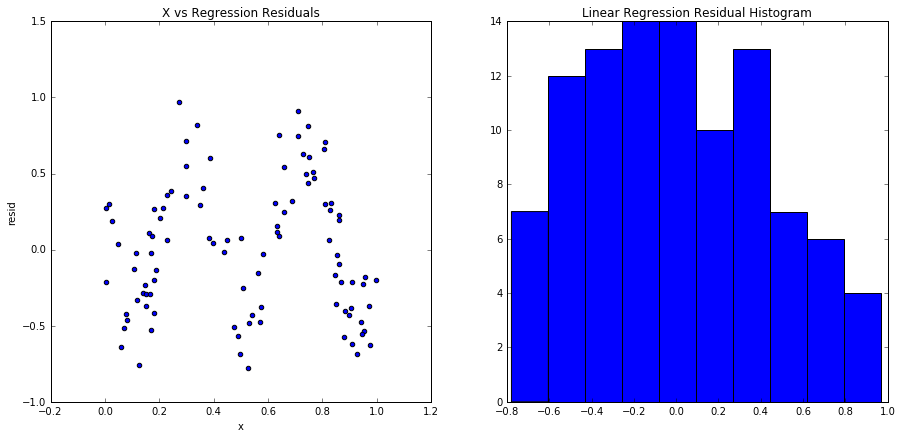

Fit 1 score is: -1.88674773557
Fit 2 score is: -0.0489364983032
Regression score is: 0.38339231828


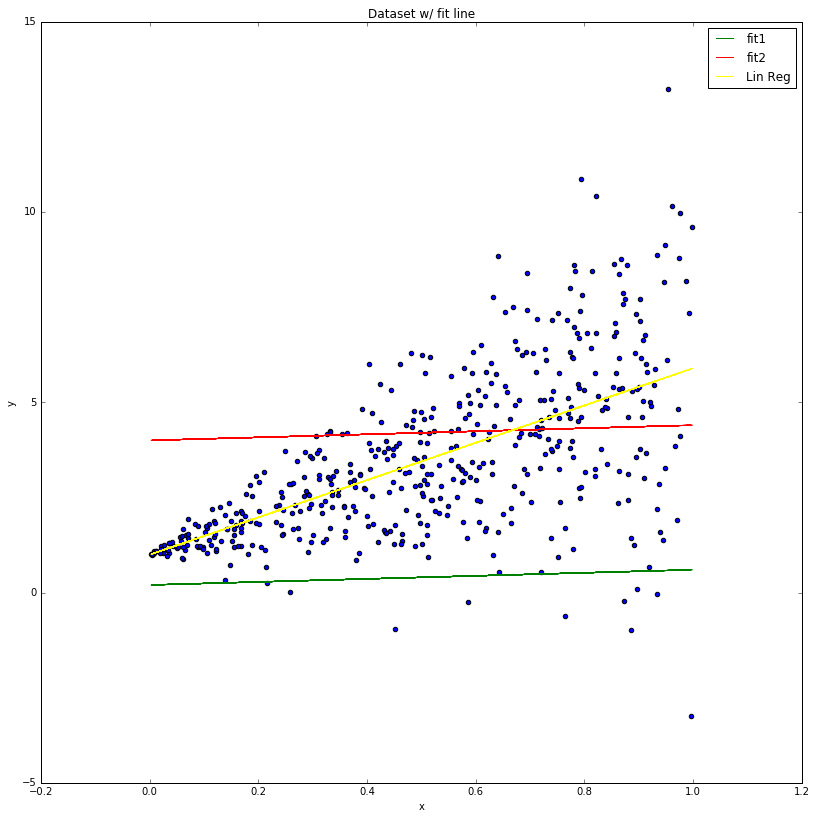

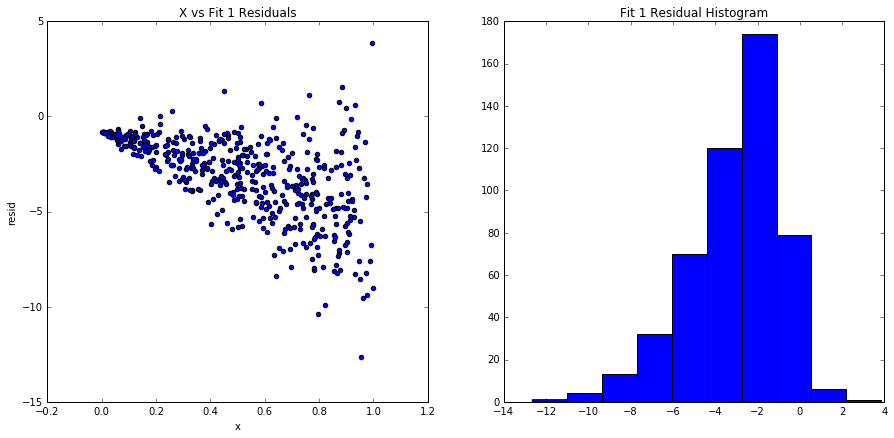

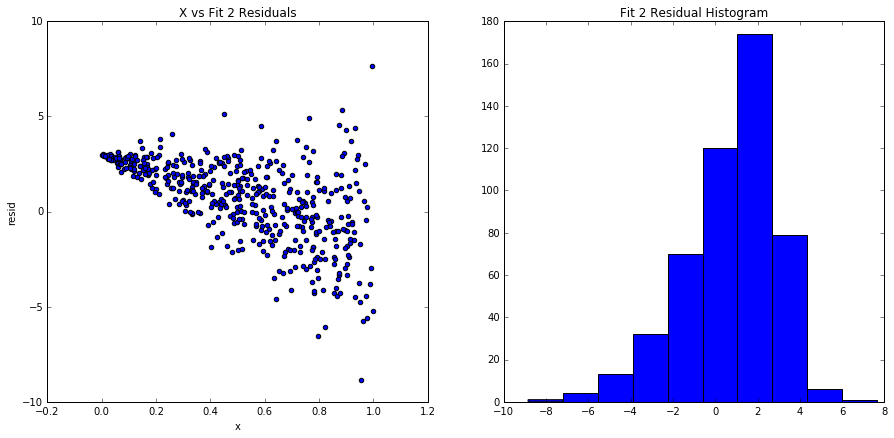

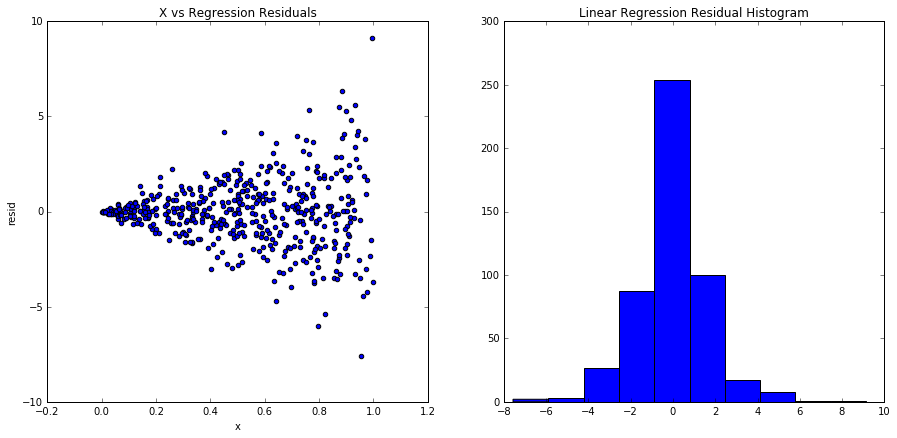

In [88]:
plotit('dataset/dataset_2_full.txt')
plotit('dataset/dataset_3_full.txt')
plotit('dataset/dataset_4_full.txt')
plotit('dataset/dataset_5_full.txt')
plotit('dataset/dataset_6_full.txt')

From these visualizations, and the scores, we see that the OLS regression is only the best linear estimator when the structure of the residuals is homoscedastic and centered around 0. If there is any structure to the residuals, we know that linear regression may not be the best estimator and we'll have to rely on either another kind of fit or on a completely different classification like KNN.

Plot 2 for example, has a bi-modal distribution of the residuals. While we know KNN and Regression score about the same with this dataset, we should probably create a different model for the different clouds of data and use that moving forward. That would account for much more of the variance.

As another example, Plot 4 shows a structure with the residuals, which is super interesting. it implies that we should probably be fitting a higher-degree polynomial fit for the function.

In plot 6, we see that the errors get higher and higher as x gets larger. This could imply that there may be some error where our instruments are not accurate as X gets higher. We'll need to correct for this when fitting a model.

---

## Challenge Problem: Combining Random Variables

This problem, we explore the distirbution of random variables that result from combining other random variables.

### Part (a): Adding Two Uniformly Distributed Variables

Consider the independent random variables $X\sim U(0, 1)$ and $Y\sim U(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

What we generate below is two uniform distributions between 0 and 1. When added together, they form a normal distribution between 0-2, centered at 1. Thinking about it too quickly, one would falsely jump to the conclusion that a uniformly distributed variable plus another uniformly distributed variable would yield another uniformly distributed variable, but by experimentation below, we see that is not the case.

The reason for this is that taking a random index 'n' of these two variables 'x' and 'y' - we can see that the probability of getting a number at any point of either distribution is uniform; however, in order to see a number from the sum of x and y that is at one end of the spectrum or the other, your chances are greatly diminished. In other words, if x1 is 0.01, y1 is as likely to be any other number as it is to be 0.01. To get a number at one end or the other in variable Z, both x1 and y1 must be at one end or the other. As such, we see a normal distribution.

This is shown in the code below.

Standard deviation of Z is 0.405565089265


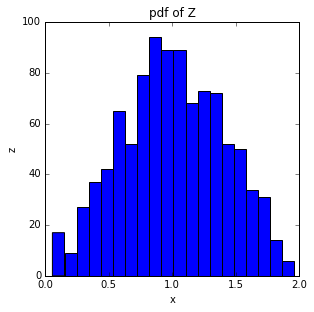

In [4]:
x = np.random.uniform(0,1,1000)
y = np.random.uniform(0,1,1000)
z = x + y

four_a = plt.figure(figsize=(10, 10))
part_a = four_a.add_subplot(221)
plt.xlabel('x')
plt.ylabel('z')
plt.title('pdf of Z')
part_a.hist(z, bins=20)
print "Standard deviation of Z is", np.std(z)

### Part (b): Adding Multiple Uniformly Distributed Variables

Consider three independent random variables $X_1, X_2, X_3 \sim U(0, 1)$. Let $Z$ be the random variable $Z = X_1 + X_2 + X_3$. 

What is the distribution of $Z$? What if you add 10 or 12 independent (standard) uniformly distributed variables? Conjecture on the distribution of 
$$
Z = \lim_{n\to \infty} \sum_{i=1}^n X_i
$$
where $\left\{X_i \right\}$ are independent (standard) uniformly distributed variables.

**Hint:** your solution can be a combination of experimentation, empirical evidence and/or algebra

**Solution:**

The same as above is happening with more additions... the standard deviation is centered around k/2; however, the standard deviation is getting relatively smaller and smaller compared to the number of additions. This is because as more and more statistical information is gained, the error of our estimations will become smaller and smaller.

Please use the function below to demonstrate for yourself.

standard deviation of z is: 2.87865411818


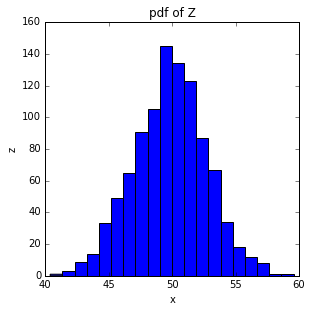

In [5]:
def pdf(k):
    z = np.zeros(1000)
    for x in range(k):
        new = np.random.uniform(0,1,1000)
        z = z + new

    four_a = plt.figure(figsize=(10, 10))
    part_a = four_a.add_subplot(221)
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title('pdf of Z')
    part_a.hist(z, bins = 20)
    print "standard deviation of z is:", np.std(z)

pdf(100)

### Part (c): Combining Normally Distributed Variables

Consider the independent random variables $X\sim \mathcal{N}(0, 1)$ and $Y\sim \mathcal{N}(0, 1)$. Let $Z$ be the random variable $Z = X + Y$. 

What is the distribution of $Z$ (give the pdf for Z)? You should fully explain and support your conlusion. 

**Hint:** use properties of expected value and some experimentation.

**Solution:**

A normally distributed variable centered around 0 with stdev of 1, x; plus another variable of the same description, y creates z: a variable normally distributed around 0 but with a standard deviation slightly higher than one. The reason for this is that when one adds two normally distributed variables index-by-index, the result is a sum of the errors of both variables. 

See the results below.

standard deviation of z is 1.37693937379
standard deviation of x was 0.988846306744


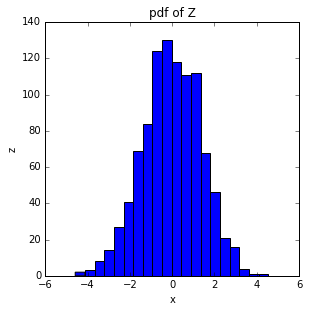

In [92]:
x = np.random.normal(0,1,1000)
y = np.random.normal(0,1,1000)
z = x + y

four_a = plt.figure(figsize=(10, 10))
part_a = four_a.add_subplot(221)
plt.xlabel('x')
plt.ylabel('z')
plt.title('pdf of Z')
part_a.hist(z, bins=20)
print "standard deviation of z is", np.std(z)
print "standard deviation of x was", np.std(x)

### Part (d): Product of Normally Distributed Variables

Is the product of two normally distributed variables a normally distributed variable? You should fully explain and support your conlusion. 

**Solution:**

In creating z in this example, what happens is the distribution remains at mean 0, but grows in magnitude. We have several scenarios for the product of our multiplication here. Positive numbers multiplied by positive numbers will create positive. Negative by negative will create positive. Positive by negative will create negative. Also with regard to magnitude, all of the numbers will get closer to 0, unless both numbers' absolute values happen to be greater than one. So what happens is you have a LOT of values close to 0, and longer tails in both directions. The standard deviation remains roughly the same because of the high preponderance of results near 0, but the tails still remain long.


standard deviation of z is 1.05718874834
standard deviation of x was 1.03289974371


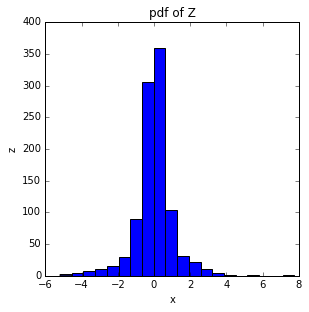

In [93]:
x = np.random.normal(0,1,1000)
y = np.random.normal(0,1,1000)
z = x * y

four_a = plt.figure(figsize=(10, 10))
part_a = four_a.add_subplot(221)
plt.xlabel('x')
plt.ylabel('z')
plt.title('pdf of Z')
part_a.hist(z, bins=20)
print "standard deviation of z is", np.std(z)
print "standard deviation of x was", np.std(x)

---